<header style="background-color: rgb(0, 62, 92); color: white; margin-top: 20px; padding:28px; ">
  <img src="images/Xlogo.png" alt="Transposition of a vector" title="Vector transposition" width="115" style="float: left;">
  <p style=" text-align: center; font-size: 32px;">   
   <strong> Simulation of Volterra Heston models made simple? </strong></p>
  <p style=" text-align: center; font-size: 25px;"><strong>  </strong></p>
  <p style=" text-align: center; font-size: 20px;"> Eduardo Abi Jaber </p>
</header>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="BS"></a><h1 style="text-align:center;">The integrated Volterra square-root process</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>


We consider an non-decreasing Volterra process $X$ of the form:
$$
X_t = \int_0^t g_0(s) ds + \int_0^t K(t-s) (b X_sds + c W_{X_s} ds) 
$$
where  $K$ is a locally integrable kernel ($L^1([0,T])$, not necessarily $L^2$) $  c \geq 0$ and $b \in \mathbb R$, $W_t$ is a standard Brownian motion and $g_0$ a suitable input curve. We will take:
$$ g_0(t) = V_0 + a \int_0^t K(r)dr, $$
with $a,V_0 \geq 0$. 

If $K\in L^2([0,T])$, then one can show using stochastic Fubini's theorem that $X$ is absolutely continuous with respect to the Lebesgue measure, i.e. $X = \int_0^{\cdot} V_s ds$ almost surely, and that the nonnegative density process $V$ satisfies a square-root stochastic Volterra equation in the form 
$$ V_t = g_0(t) + \int_0^t K(t-s) (b V_s ds + c\sqrt{V_s}dW_s). $$
In particular for the fractional kernel 
$$ K_H(t) = \frac{1}{\Gamma(H+0.5)}t^{H-1/2}, $$
with $H \in (0,1/2]$ one recovers the rough square-root process used for instance to model the instanteneous variance of a stock.  In this case, $X$ plays the role of the integrated variance. 

If $H \in (-1/2,0]$, $K_H$ is no longer in $L^2$ but only in $L^1$ but still the equation for $X$ makes sense, but $X$ is no longer absolutely continuous with respect to the Lebsegue measure, and the process $V$ no longer makes sense. 

In the sequel, we will develop a simple scheme to simulate $X$ for any kernel $K \in L^1([0,T])$. We won't bother with the process $V$.  The difficult part is to construct a scheme for which $X$ is non-decreasing. 





<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="BS"></a><h1 style="text-align:center;">The scheme </h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>


Define 
$$ U_{t,s} := X_s - X_t, \quad Z_{t,s}  = \int_t^s dW_{X_u}, \quad t\leq s, $$
and
$$ g_t(s) := g_0(s) + \int_0^t K(s-u) (bdU_{0,u} + c dZ_{0,u}), \quad t < s .$$
When we write $dZ_{t,u}$ we mean differential in the second variable $u$.  (In case of square integrable kernel, $g_t(s) = \mathbb E[ V_s | \mathcal F_t]$ with $V$ the density process.)

Using the equation for $X$, the dynamics of $U$ can be written in the form
$$ U_{t,s} = \int_t^s g_t(u) du +  \int_t^s K(s-u) (b U_{t,u} + c Z_{t,u} du)  $$

We are simply going to discretize the second integral appearing  using a right-point  approximation
$$
\int_t^s K(s-u) (b U_{t,u} + c Z_{t,u} du) \approx \int_t^s K(s-u) du ( b U_{t,s} + cZ_{t,s}) = \int_0^{t-s} K(u) du  ( b U_{t,s} + cZ_{t,s})
$$


This leads to the scheme
$$ 
U_{i,i+1}  = \alpha_i + b K_{i}  U_{i,i+1} + c  K_{i}   W_{U_{i,i+1}}
$$
with 
$$ \alpha_i =  \int_{t_i}^{t_{i+1}} g_{t_i}(u) du, \quad   K_i = \int_0^{t_{i+1}-t_{i}} K(u) du  $$

This means that, at time $t$ since we have access to $\alpha_i$, all we need to know to obtain $U_{i,i+1}$ is to simulate a random variable $X$ satisfying 
$$ X = \alpha + \sigma W_X  $$
but this is nothing than an **Inverse Gaussian** distribution 
$$ X = IG ( \alpha, (\alpha/\sigma)^2 )  $$
See https://en.wikipedia.org/wiki/Inverse_Gaussian_distribution

# Developping expression of $\alpha_i$
$$ \alpha_i =  \int_{t_i}^{t_{i+1}} g_{t_i}(s) ds = \int_{t_i}^{t_{i+1}} g_{0}(s) ds  + \int_{t_i}^{t_{i+1}} \int_0^{t_{i}} K(s-u) (bdU_{0,u} + c dZ_{0,u})  du ds $$
Now we observe that $d{Z_{0,u}} = dZ_{t_j,u}$ whenever, $t_j\leq u$ (similar for $U$) so that we can write:
$$   \int_0^{t_{i}} K(s-u) (bdU_{0,u} + c dZ_{0,u}) = \sum_{j=0}^{i-1} \int_{t_{j}}^{t_{j+1}} K(s-u)  (bdU_{{t_j},u} + c dZ_{{t_j},u}),   $$
so that an application of Fubini yields 
$$ \alpha_i =  \int_{t_i}^{t_{i+1}} g_{t_i}(s) ds = \sum_{j=0}^{i-1}  \int_{t_{j}}^{t_{j+1}}  \left(  \int_{t_i}^{t_{i+1}}  K(s-u)ds \right) (bdU_{t_{j},u} + c dZ_{t_j,u})  du \approx \sum_{j=0}^{i-1}  K_{ij}  \int_{t_{j}}^{t_{j+1}}  (bdU_{t_{j},u} + c dZ_{t_j,u})  du = \sum_{j=0}^{i-1}  K_{ij} (b U_{t_{j},t_{j+1}} + c Z_{t_{j},t_{j+1}})   ,  $$
with 

$$ K_{ij}:= \int_{t_i}^{t_{i+1}} K(s-t_j) ds, \quad j = 0,1, \ldots, i-1. $$

# Scheme 



Fix $t_0 = 0 < t_1 < \ldots < t_n = T$ a partition and  construct $(Z_{j,j+1})_{i=0,\ldots, n}$ and $(U_{i,i+1})_{i=0,\ldots, n-1}$  recursively. For each $i=0,\ldots, N-1$ 
First we compute $\alpha_i$ 
$$ \alpha_{i}  = \int_{t_i}^{t_{i+1}} g_0(s) ds + \sum_{j=0}^{i-1}   K_{ij} (b U_{j,j+1}  +  c Z_{j,j+1})  $$
with an initialization (for $i=0$) to $\alpha_0=\int_0^{t_1} g_0(s) ds$ and 
$$ K_{ij}:= \int_{t_i}^{t_{i+1}} K(s-t_j) ds, \quad j = 0,1, \ldots, i-1. $$

we  first use the expression for the integrated variance 
$$
U_{i,{i+1}}  = \alpha_i  + b K_i U_{i,i+1}   + c K_i  W_{U_{i,i+1}} .
$$
to simulate  (here we need $1-bK_i\geq 0$, but usually $b\leq 0$ so it is verified)
$$ U_{i,i+1} \sim IG \left(\frac{\alpha_i}{ 1 - b K_i}, \left(\frac{\alpha_i}{c K_i}\right)^2 \right) $$
and we set $Z_{i,i+1} = \frac{1}{c K_i}( (1-bK_i)U_{i,i+1} - \alpha_i)$.



**TO DO:** argue that $\alpha_i\geq 0$ for all $i$ so that the scheme is well-defined. Numerics say its true. Also figure out a way to recover sample paths of the variance process $V$ (when it exists) from $U$ and $Z$. 




# Comparison with the Markovian case
When $K(t)=\exp(bt)$, then one can show that $g_t(s) = E[V_s|\mathcal F_t] = V_t e^{b(t-s)} + \frac{a}{b}(1- e^{b(t-s)})$ and in this case $g_0(t) = V_0 e^{bt} +\frac{a}{b}(1- e^{b t}) $. So the expression for $g_t$ simplifies, as well as the expression for $\alpha$.  Note that $\alpha$ encodes all the non-Markovianity without additionnal information. As sanity check we implement the scheme for the exponential kernel **simulate_exp_vectorized** below here with the full alpha as above, and compared it with the scheme we implemented previsoulsy and they match...  




# Fractional kernel
$$K_H(t)=\frac{t^{H-1/2}}{\Gamma(H+0.5)} , \quad H \in (-1/2, 1/2], \quad g_0(t) = V_0 + a \frac{t^{H + 0.5}}{(H + 0.5 )\Gamma(H+0.5)} $$

The following quantities need to be computed with:

$$ \int_{t_i}^{t_{i+1}} g_0(s) ds = V_0  (t_{i+1} -t_i) +  a \frac{t_{i+1}^{H + 1.5} -t_i^{H + 1.5}}{(H + 1.5 )(H + 0.5 )\Gamma(H+0.5)}    $$
$$  K_i = \int_0^{t_{i+1} - t_i} K(u) du = \frac{(t_{i+1} -t_i)^{H + 0.5}}{(H + 0.5 )\Gamma(H+0.5)}, \quad i =0, \ldots, n.$$
$$ K_{ij} = \int_{t_i}^{t_{i+1}} K(u - t_j) du  =  \frac{(t_{i+1} -t_j)^{H + 0.5} -(t_{i} -t_j)^{H + 0.5}  }{(H + 0.5 )\Gamma(H+0.5)}, \quad j = 0, \ldots i-1, \quad  i =1, \ldots, n $$

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.special import gamma

In [2]:
#Generate random normals and uniforms and stock them 
random.seed(1)
NNN = 300 #steps
MMM = 100_000 #number of sample paths
x_norm = np.random.normal(0, 1, (NNN,MMM))
x_norm2 = np.random.normal(0, 1, (NNN,MMM))
x_uniform = np.random.uniform(0, 1, (NNN,MMM))

In [31]:
def inverse_gaussian_sample_vectorized(mu, lambda_, x_n, x_u):
    """
    Vectorized version of the inverse Gaussian sampling function.
    """
    y = x_n ** 2  # std normal squared
    x = mu + (mu ** 2 * y) / (2 * lambda_) - (mu / (2 * lambda_)) * np.sqrt(4 * mu * lambda_ * y + mu ** 2 * y ** 2)
    condition = x_u <= mu / (mu + x)
    samples = np.where(condition, x, (mu ** 2) / x)
    return samples 



def simulate_rough_vectorized(H, a, b, c, rho, V_0, T, n_steps, n_paths, S_0=1., rng=None):
    if rng is None:
        rng=np.random.default_rng(seed=42)
    #discretize time
    dt = T / n_steps
    
    #pre-compute certain quantities indepenendt of i and m
    K_int_dt = (dt)**(H + 0.5) / (( H + 0.5) * gamma( H + 0.5 ))
    a_H      = a*(dt)**( H + 1.5 )/(  ( H + 0.5)*( H + 1.5) * gamma( H + 0.5 ) ) 
    sigma    = c * K_int_dt
    rho_bar = np.sqrt(1 - rho * rho)
    
    ## Compute the K_matrix K_ij
    # Create arrays for broadcasting
    i_indices = np.arange(n_steps).reshape(-1, 1)
    j_indices = np.arange(n_steps).reshape(1, -1)

    K_matrix = np.maximum(1 + i_indices - j_indices, 0)**(H + 0.5) - np.maximum(i_indices - j_indices, 0)**(H + 0.5)
    K_matrix = np.tril(K_matrix, k=-1)  # Retain only the lower triangular part
    K_matrix *= dt**(H + 0.5) / ((H + 0.5)*gamma( H + 0.5 ))

    
    #Initialize logS
    logS = np.zeros(n_paths)
    #V = V_0*np.ones(n_paths)
    U = np.zeros(n_paths)
    
    #Need to stock the Z, U now because of non-markovianity
    Z, dU = np.zeros((n_steps, n_paths)), np.zeros((n_steps, n_paths))
    
    for i in range(n_steps):
        
        tilde_alpha_i = V_0 * dt + a_H*( ( i + 1 )**( H + 1.5 )   - i**( H + 1.5 ))
        alpha_i = tilde_alpha_i + c * K_matrix[i, : ] @ Z + b * K_matrix[i, : ] @ dU
        mu = alpha_i / ( 1 - b * K_int_dt)
        lambda_ = (alpha_i / sigma)**2
        # print(mu, lambda_)
        dU_i = rng.wald(mean=mu, scale=lambda_, size=n_paths) # inverse_gaussian_sample_vectorized(mu, lambda_, x_norm[i,:n_paths], x_uniform[i,:n_paths])
        Z_i   = (1. / sigma) * ((1 - b * K_int_dt) * dU_i - alpha_i)
        
        logS = logS - 0.5 * dU_i + rho * Z_i + rho_bar * np.sqrt(dU_i) * x_norm2[i,:n_paths]           
        U = U + dU_i
        
        Z[i, :] = Z_i.T
        dU[i, :] = dU_i.T
        
    
    return (S_0*np.exp(logS),  U, Z, dU)



def simulate_exp_vectorized(a, b, c, rho, V_0, T, n_steps, n_paths, S_0=1.):
    #discretize time
    dt = T / n_steps
    
    #pre-compute certain quantities indepenendt of i and m
    exp_bdt = np.exp(b * dt)
    K_int_dt = (exp_bdt - 1 ) / b
    a_b     = (a / b**2)
    sigma    = c * K_int_dt
    rho_bar = np.sqrt(1 - rho * rho)
    
    ## Compute the K_matrix K_ij
    # Create arrays for broadcasting
    i_indices = np.arange(n_steps).reshape(-1, 1)
    j_indices = np.arange(n_steps).reshape(1, -1)

    K_matrix = np.exp(dt * b * np.maximum(i_indices - j_indices, 0)) - np.exp(dt * b * np.maximum(i_indices - j_indices - 1, 0))
    # Wether right or left point makes huge diffrenece on positivity! To understand...
    #K_matrix = np.exp(dt * b * np.maximum( 1 + i_indices - j_indices, 0)) - np.exp(dt * b * np.maximum(i_indices - j_indices, 0))
    K_matrix = np.tril(K_matrix)  # Retain only the lower triangular part
    K_matrix *= 1. / b 

    
    #Initialize logS
    logS = np.zeros(n_paths)
    V = V_0*np.ones(n_paths)
    U = np.zeros(n_paths)
    
    #Need to stock the Z now because of non-markovianity
    Z = np.zeros((n_steps, n_paths))
    
    for i in range(n_steps):
        tilde_alpha_i = (V_0 +  a / b )*( np.exp( b * ( i + 1 )*dt)   - np.exp(b* i * dt)) / b  - dt * a / b 
        alpha_i = tilde_alpha_i + c * K_matrix[i, : ] @ Z
        
        alpha2_i = V * K_int_dt + (a / b) * ( K_int_dt - dt )
        
        mu = alpha_i 
        lambda_ = (alpha_i / sigma)**2
        
        dU_i = rng.wald(mean=mu, scale=lambda_, size=n_paths) #inverse_gaussian_sample_vectorized(mu, lambda_, x_norm[i,:n_paths], x_uniform[i,:n_paths])
        Z_i   = (1. / sigma) * (dU_i - alpha_i)
        
        logS = logS - 0.5 * dU_i + rho * Z_i + rho_bar * np.sqrt(dU_i) * x_norm2[i,:n_paths]           
        U = U + dU_i
        
        V = V + a*dt + b*dU_i + c*Z_i
        
        Z[i, :] = Z_i
        
        
    
    return (S_0*np.exp(logS),  U)



In [32]:
def simulate_V_rough_vectorized(H, a, b, c, rho, V_0, T, n_steps, n_paths, Z, dU, S_0=1.):
    #discretize time
    dt = T / n_steps
    
    #pre-compute certain quantities indepenendt of i and m
    K_int_dt = (dt)**(H + 0.5) / (( H + 0.5) * gamma( H + 0.5 ))
    a_H      = a*(dt)**( H + 1.5 )/(  ( H + 0.5)*( H + 1.5) * gamma( H + 0.5 ) ) 
    sigma    = c * K_int_dt
    rho_bar = np.sqrt(1 - rho * rho)
    
    ## Compute the K_matrix K_ij
    # Create arrays for broadcasting
    i_indices = np.arange(n_steps).reshape(-1, 1)
    j_indices = np.arange(n_steps).reshape(1, -1)

    K_matrix = np.maximum(1 + i_indices - j_indices, 0)**(H + 0.5) - np.maximum(i_indices - j_indices, 0)**(H + 0.5)
    K_matrix = np.tril(K_matrix)  # Retain only the lower triangular part
    K_matrix *= dt**(H + 0.5) / ((H + 0.5)*gamma( H + 0.5 ))
     
    
    #Initialize logS
    logS = np.zeros(n_paths)
    #V = V_0*np.ones(n_paths)
    U = np.zeros(n_paths)
    
    #approximating V in different ways
    V1, V2 = np.zeros((n_steps, n_paths)), np.zeros((n_steps, n_paths))
    V2 = dU / dt
    
    for i in range(n_steps):
        g_0_ti = V_0 +  a*(i * dt)**( H + 0.5 )/(  ( H + 0.5) * gamma( H + 0.5 ) ) 
        V1[i, :] =  g_0_ti + (c * K_matrix[i, : ] @ Z + b * K_matrix[i, : ] @ dU) / dt
                
    
    return (V1,  V2)



18
0


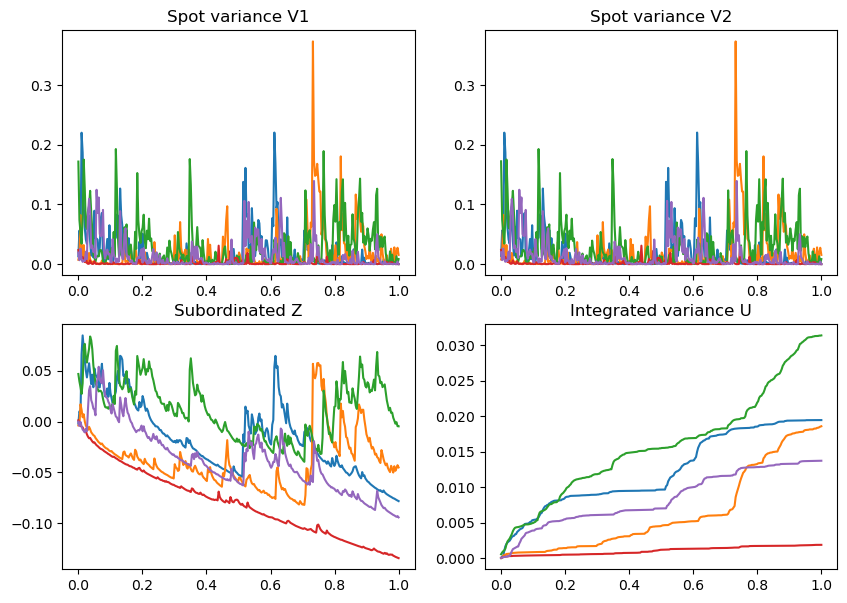

In [36]:
H = 0.1
a, b, c , rho = 0.02, - 0.3, .3 , -0.7
V_0=  0.02
    
S_0 = 1.

T = 1. 
K = 1. 
K_U = V_0 

n_steps = 300
n_paths = 5
t_vec = np.linspace(0, T, n_steps)
S,  U, Z, dU = simulate_rough_vectorized(H, a, b, c, rho, V_0, T, n_steps, n_paths, S_0)


V1, V2 = simulate_V_rough_vectorized(H, a, b, c, rho, V_0, T, n_steps, n_paths, Z, dU, S_0=1.)

print(np.sum((V1 < 0)))
print(np.sum(V2<0))

fig = plt.figure(figsize=(10,7))
plt.subplot(2, 2, 1)
plt.plot(t_vec, V1[:, 0:10])
plt.title('Spot variance V1')
plt.subplot(2, 2, 2)
plt.plot(t_vec, V2[:, 0:10])
plt.title('Spot variance V2')
plt.subplot(2, 2, 3)
plt.plot(t_vec, np.cumsum(Z[:, 0:10], axis=0))
plt.title('Subordinated Z')
plt.subplot(2, 2, 4)
plt.plot(t_vec, np.cumsum(dU[:, 0:10], axis=0))
plt.title('Integrated variance U')
plt.show()

# First test , fractional kernel

Parameters as in Figures 1, 4 and 5 in:
https://epubs.siam.org/doi/pdf/10.1137/21M1443807?casa_token=7as5_DHgp6gAAAAA:J1jlH9d5L2BPaaYkRU4xX-b9bPpk_fz8NY1OLCivmInasR55EPoAzR_-VVgbAfGAifXLGDh1RCEXIQ

In [39]:
n_paths=10
S,  U, Z, dU = simulate_rough_vectorized(H, a, b, c, rho, V_0, T, n_steps, n_paths, S_0)

U

array([0.01094649, 0.00673411, 0.01511062, 0.00564619, 0.00501353,
       0.02830815, 0.04990314, 0.01556773, 0.00310947, 0.03674337])

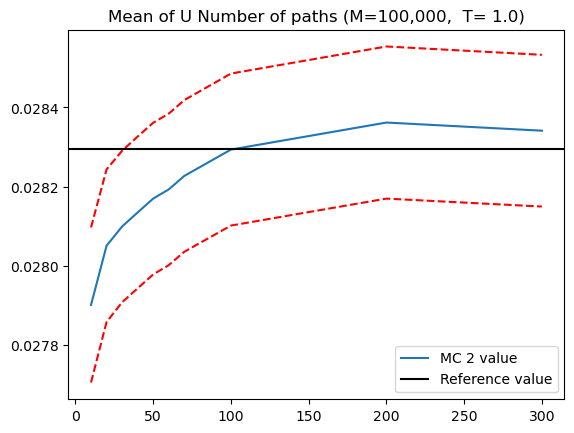

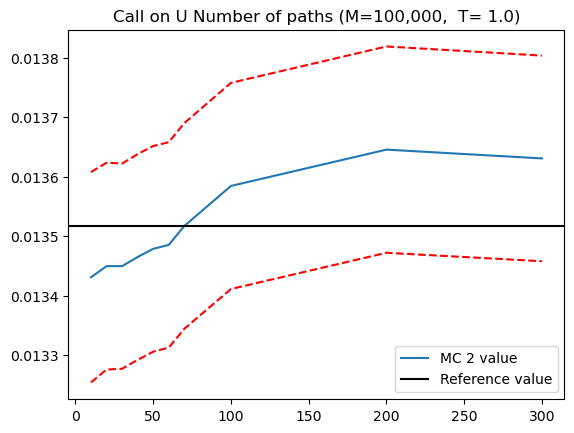

In [38]:
H = 0.1
a, b, c , rho = 0.02, - 0.3, .3 , -0.7
V_0=  0.02
    
S_0 = 1.

T = 1. 
K = 1. 
K_U = V_0 


n_paths = 100_000
N_steps = [1, 10, 20, 30, 40, 50, 60, 70, 100, 200, 300]
MC_mean_vec = []
MC_std_vec = []
MC_U_mean_vec = []
MC_U_std_vec  = []
MC_Ucall_mean_vec  = []
MC_Ucall_std_vec  = []

for n_steps in N_steps:
    S,  U, Z, dU = simulate_rough_vectorized(H, a, b, c, rho, V_0, T, n_steps, n_paths, S_0)
    # MC_mean = np.mean(np.maximum(S - K , 0.))
    # MC_std = np.std(np.maximum(S - K, 0.))
    # MC_mean_vec.append(MC_mean)
    # MC_std_vec.append(MC_std)
    MC_mean = np.mean(U)
    MC_std = np.std(U)
    MC_U_mean_vec.append(MC_mean)
    MC_U_std_vec.append(MC_std)
    MC_mean = np.mean(np.maximum(U - K_U , 0.))
    MC_std = np.std(np.maximum(U - K_U, 0.))
    MC_Ucall_mean_vec.append(MC_mean)
    MC_Ucall_std_vec.append(MC_std)
    
# plt.plot(N_steps, MC_mean_vec, label = 'MC 2 value')
# plt.plot(N_steps, MC_mean_vec - 1.96*np.array(MC_std_vec)/np.sqrt(n_paths),  color = 'r', linestyle = '--')
# plt.plot(N_steps, MC_mean_vec + 1.96*np.array(MC_std_vec)/np.sqrt(n_paths),  color = 'r', linestyle = '--')
# plt.axhline(y =   0.0572 , color = 'black', label = 'Reference value')
# plt.legend()
# plt.title(f"Call on price Number of paths (M={n_paths:,},  T= {T})")
# plt.show()

mmm = 1
plt.plot(N_steps[mmm:], MC_U_mean_vec[mmm:], label = 'MC 2 value')
plt.plot(N_steps[mmm:], MC_U_mean_vec[mmm:] - 1.96*np.array(MC_U_std_vec[mmm:])/np.sqrt(n_paths),  color = 'r', linestyle = '--')
plt.plot(N_steps[mmm:], MC_U_mean_vec[mmm:] + 1.96*np.array(MC_U_std_vec[mmm:])/np.sqrt(n_paths),  color = 'r', linestyle = '--')
plt.axhline(y =   0.028295 , color = 'black', label = 'Reference value')
plt.legend()
plt.title(f"Mean of U Number of paths (M={n_paths:,},  T= {T})")
plt.show()

mmm = 1
plt.plot(N_steps[mmm:], MC_Ucall_mean_vec[mmm:], label = 'MC 2 value')
plt.plot(N_steps[mmm:], MC_Ucall_mean_vec[mmm:] - 1.96*np.array(MC_Ucall_std_vec[mmm:])/np.sqrt(n_paths),  color = 'r', linestyle = '--')
plt.plot(N_steps[mmm:], MC_Ucall_mean_vec[mmm:] + 1.96*np.array(MC_Ucall_std_vec[mmm:])/np.sqrt(n_paths),  color = 'r', linestyle = '--')
plt.axhline(y =    0.013517 , color = 'black', label = 'Reference value')
plt.legend()
plt.title(f"Call on U Number of paths (M={n_paths:,},  T= {T})")
plt.show()

# Sanity check with exponential kernel

In [125]:
a, b , c , rho = 0.5*0.04,  -0.5, 1.,-0.9
V_0=  0.04
    
S_0 = 100.


T = 10.

K = 100.

n_paths = 10_000
N_steps = [1, 10, 20, 30, 40, 50]
MC_mean_vec = []
MC_std_vec = []
MC_QE_mean_vec = []
MC_QE_std_vec  = []

for n_steps in N_steps:
    S,  U = simulate_exp_vectorized(a, b, c, rho, V_0, T, n_steps, n_paths, S_0)
    MC_mean = np.mean(np.maximum(S - K , 0.))
    MC_std = np.std(np.maximum(S - K, 0.))
    MC_mean_vec.append(MC_mean)
    MC_std_vec.append(MC_std)
    
plt.plot(N_steps, MC_mean_vec, label = 'MC exp value')
plt.plot(N_steps, MC_mean_vec - 1.96*np.array(MC_std_vec)/np.sqrt(n_paths),  color = 'r', linestyle = '--')
plt.plot(N_steps, MC_mean_vec + 1.96*np.array(MC_std_vec)/np.sqrt(n_paths),  color = 'r', linestyle = '--')
plt.axhline(y =   13.08467014 , color = 'black', label = 'Reference value')
plt.legend()
plt.title(f"Number of paths (M={n_paths:,},  T= {T})")
plt.show()

0.028227895284104194


0.028295